## Seaborn - Intro

In [ ]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(
                                            lambda x: ast.literal_eval(x) 
                                            if isinstance(x, str) else x 
                                            if isinstance(x, list) else None)

Install and Import Seaborn

In [2]:
import seaborn as sns

In [3]:
# Only get Data Analyst Roles in US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization 
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

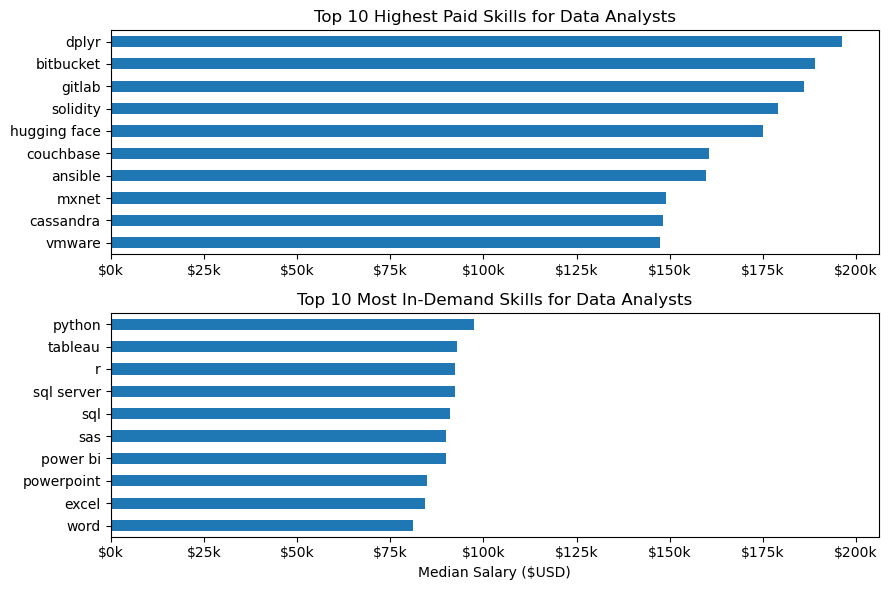

In [7]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)
df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

fig, ax = plt.subplots(2,1)

df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], figsize=(9,6), legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))

df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))

plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_23248\736588254.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], palette='light:g_r', legend=False)


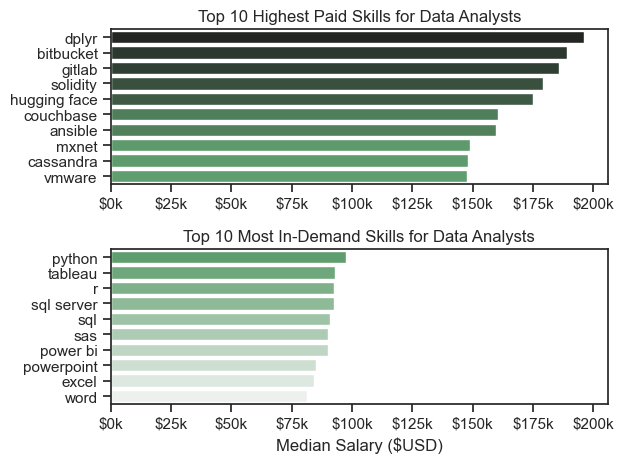

In [24]:
fig, ax = plt.subplots(2,1)

sns.set_theme(style='ticks')

sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:g_r', legend=False)


# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], figsize=(9,6), legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))

sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], palette='light:g_r', legend=False)

# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))

plt.tight_layout()
plt.show()

## Histograms

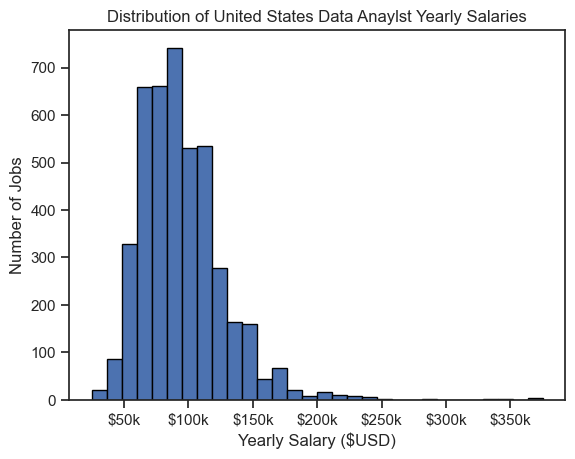

In [28]:
# Data Analyst roles from US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')



plt.title('Distribution of United States Data Anaylst Yearly Salaries')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.show()

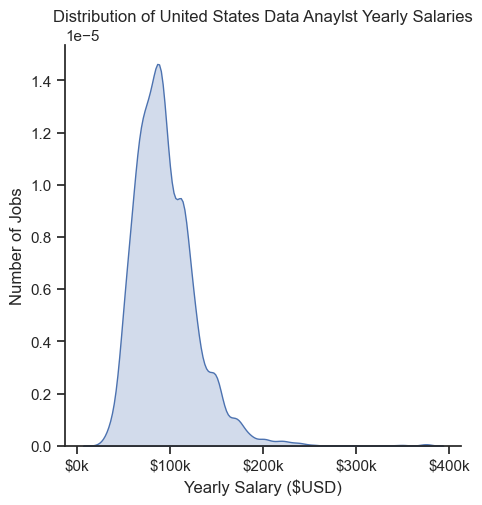

In [32]:

sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True)
plt.title('Distribution of United States Data Anaylst Yearly Salaries')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.show()

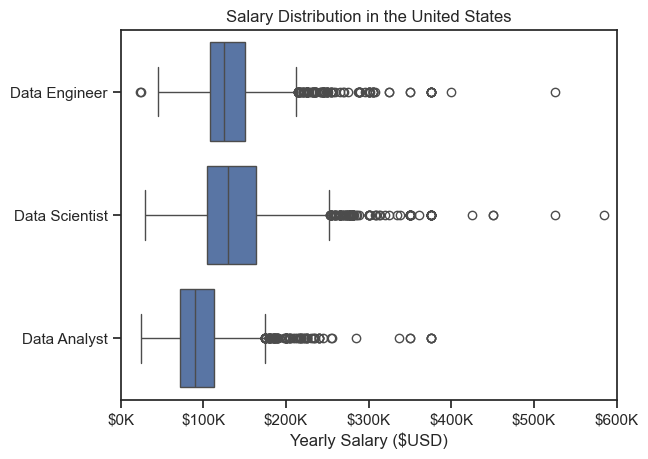

In [34]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

#Only get Data Jobs from US
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

#Drop NaN values from the column for plotting
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [(df_US[df_US['job_title_short'] == job_title]['salary_year_avg']) for job_title in job_titles]

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
 
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.xlim(0,600000)
plt.show()